# <font color='#7ad7f0'><font size='30'> ANALYSIS PART</font></font>
#### Scraping the-numbers.com for movie data

In [1]:
# Importing necessary libraries

import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns
import time
import statsmodels.formula.api as smf 
import statsmodels.api as sm
import matplotlib as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.model_selection import (cross_validate,cross_val_score, train_test_split, KFold, GridSearchCV)
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn import metrics
from IPython import display
from mpl_toolkits.mplot3d import Axes3D


sns.set(style="ticks", color_codes=True)



## Adding additional analysis functions

In [2]:

#For a set of features and target X, y, perform a 80/20 train/val split, 
#fit and validate a linear regression model, and report results


def split_and_validate(X, y):

    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}')

#Plot the approximation of ``est`` on axis ``ax``. 
def plot_approximation(est, ax, label=None):

    ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
    ax.scatter(X, y, s=100)
    ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right',frameon=True)
    
#Generates a probability plot of sample data against the quantiles of a 
# specified theoretical distribution 
    
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)

    plt.subplot(1, 3, 1)
    plt.scatter(x,y)
    plt.plot(x, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)

    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")
    
 

# Creating dataframe
Compiling and cleaning data spread across multiple csv files

In [3]:
df1= pd.read_csv("/Users/ramonmartin/Documents/METIS/Project 2/movdf.csv")
df2= pd.read_csv("/Users/ramonmartin/Documents/METIS/Project 2/movdf2.csv")
df3= pd.read_csv("/Users/ramonmartin/Documents/METIS/Project 2/movdf3.csv")
df4= pd.read_csv("/Users/ramonmartin/Documents/METIS/Project 2/movdf4.csv")
df5= pd.read_csv("/Users/ramonmartin/Documents/METIS/Project 2/movdf5.csv")
frames = [df1, df2, df3, df4, df5]

df = pd.concat(frames)
df.columns = ['number', 'budget', 'dom_gross', 'tot_gross', 'director', 'actor', 'release', 'genre', 'mpaa']

act_df= pd.read_csv("/Users/ramonmartin/Documents/METIS/Project 2/actor_rating.csv", header=None)
act_df.columns = ['number', 'actor', 'tot_gross', 'movies', 'act_avg_gross']

dir_df= pd.read_csv("/Users/ramonmartin/Documents/METIS/Project 2/dir_rating.csv", header=None)
dir_df.columns = ['number', 'director', 'tot_gross', 'movies', 'dir_avg_gross']

#cleaning values to have only alphanumeric chars
df['actor'] = df['actor'].str.replace(',','').str.lower()
df['actor'] = df['actor'].str.replace('-','')
df['actor'] = df['actor'].str.replace('.','')
df['actor'] = df['actor'].str.replace(' ','')
df['director'] = df['director'].str.replace(',','').str.lower()
df['director'] = df['director'].str.replace('-','')
df['director'] = df['director'].str.replace('.','')
df['director'] = df['director'].str.replace(' ','')
act_df['actor'] = act_df['actor'].str.replace(',','').str.lower()
act_df['actor'] = act_df['actor'].str.replace('-','')
act_df['actor'] = act_df['actor'].str.replace('.','')
act_df['actor'] = act_df['actor'].str.replace(' ','')
act_df['tot_gross'] = act_df['tot_gross'].str.replace('$', '')
act_df['tot_gross'] = act_df['tot_gross'].str.replace(',', '')
act_df['act_avg_gross'] = act_df['act_avg_gross'].str.replace('$', '')
act_df['act_avg_gross'] = act_df['act_avg_gross'].str.replace(',','')
dir_df['director'] = dir_df['director'].str.replace(',','').str.lower()
dir_df['director'] = dir_df['director'].str.replace('-','')
dir_df['director'] = dir_df['director'].str.replace('.','')
dir_df['director'] = dir_df['director'].str.replace(' ','')
dir_df['tot_gross'] = dir_df['tot_gross'].str.replace('$', '')
dir_df['tot_gross'] = dir_df['tot_gross'].str.replace(',', '')
dir_df['dir_avg_gross'] = dir_df['dir_avg_gross'].str.replace('$', '')
dir_df['dir_avg_gross'] = dir_df['dir_avg_gross'].str.replace(',',"")

#reseting all indexes

df = df.reset_index(drop=True)
act_df = act_df.reset_index(drop=True)
dir_df = dir_df.reset_index(drop=True)

In [4]:
#adding actor and director average gross columns to main df from actor and director independent df's

act_df= act_df[['actor', 'act_avg_gross']]
dir_df= dir_df[['director', 'dir_avg_gross']]

df=df.merge(dir_df, on = 'director', how = 'left')
df=df.merge(act_df, on = 'actor', how = 'left')

In [5]:
#dropping all rows that are missing data

df= df.fillna(0)
df = df[df.dom_gross != 0] 
df = df[df.tot_gross != 0] 
df = df[df.dir_avg_gross != 0]
df = df[df.act_avg_gross != 0]
print(df.shape)
df

(318, 11)


,number,budget,dom_gross,tot_gross,director,actor,release,genre,mpaa,dir_avg_gross,act_avg_gross
0,1,400000000,858373000,2797800564,joerusso,robertdowneyjr,2019/04/23,Action,PG-13,977749795,334345996
1,2,379000000,241063875,1045663875,robmarshall,johnnydepp,2011/05/20,Adventure,PG-13,304800619,198366169
2,3,365000000,459005868,1396099202,josswhedon,jamesspader,2015/04/22,Action,PG-13,591169541,288853456
3,4,306000000,936662225,2065478084,jjabrams,adamdriver,2015/12/16,Adventure,PG-13,775088229,336013497
4,5,300000000,678815482,2048359754,joerusso,robertdowneyjr,2018/04/25,Action,PG-13,977749795,334345996
...,...,...,...,...,...,...,...,...,...,...,...
481,482,90000000,93432655,162525156,antoinefuqua,denzelwashington,2016/09/12,Western,PG-13,72426988,91440344
484,485,90000000,83107829,203932174,bryansinger,tomcruise,2008/12/25,Thriller-or-Suspense,PG-13,373044020,238442923
485,486,90000000,78765986,244041804,chriscolumbus,adamsandler,2015/07/16,Adventure,PG-13,255727513,137769003
487,488,90000000,75817994,155750628,robminkoff,eddiemurphy,2003/11/26,Adventure,PG,250854339,160720242


In [6]:
# changing avg_gross data type from obj to int
df[["dir_avg_gross", "act_avg_gross"]] = df[["dir_avg_gross", "act_avg_gross"]].apply(pd.to_numeric)
df.dtypes

number            int64
budget            int64
dom_gross         int64
tot_gross         int64
director         object
actor            object
release          object
genre            object
mpaa             object
dir_avg_gross     int64
act_avg_gross     int64
dtype: object

In [ ]:
# function cheatsheet 

col_one_list = df0['one'].tolist() # makes list from col 

col_one_arr = df0['one'].to_numpy() # makes numpy array from col 

df0.drop(df0.loc[df0['one']==0].index, inplace=True) #drops row with value 0 in col 'one'

df0 = pd.concat([df01, df02, df03]) #joins dfs together

df0.drop(["one"], axis=1, inplace=True) # removs col 'one'

df0.apply(pd.to_numeric) # changes all cols to dtype int/float

df0['one'].apply(pd.to_numeric) # changes col 'one' to int/float

df0["one"] = df0["one"].astype(int) #changes col 'one' to any data type (int, bool, etc)

X, y = df0[['one','two']], df0['thress'] # creates x1, x2 from 'one, 'two, and y from 'three'

df0.to_csv('new_csv.csv', index=False) # generates csv in the same folder  

df0=df0.merge(df01, on = 'one', how = 'left') # merges df's i.e. if row0 value of df0['one']== row5 df01['one'] then df01 all
# other columns values of row5 from df01 gets added to row0 of df0 


# Adding MPAA ratings

In [7]:
test_df = df
test_df['pg'] = df.apply(lambda x: x.mpaa=="PG", axis = 1).astype(int)
test_df['pg13'] = df.apply(lambda x: x.mpaa=="PG-13", axis = 1).astype(int)
test_df['r'] = df.apply(lambda x: x.mpaa=="R", axis = 1).astype(int)
test_df['g'] = df.apply(lambda x: x.mpaa=="G", axis = 1).astype(int)
test_df = test_df.drop(['number', 'dom_gross', 'genre','actor', 'director', 'mpaa', 'release'], axis=1) 
lst1=set(df.genre.tolist())
for a in lst1:
    test_df[a] = df.apply(lambda x: x.genre==a, axis = 1).astype(int)

    

## Exploring possible correlations
Expecting only few to show any sort of correlation. This chart is only fro preliminary analysis, as a rule of thumb never show this graph in your presentations. 

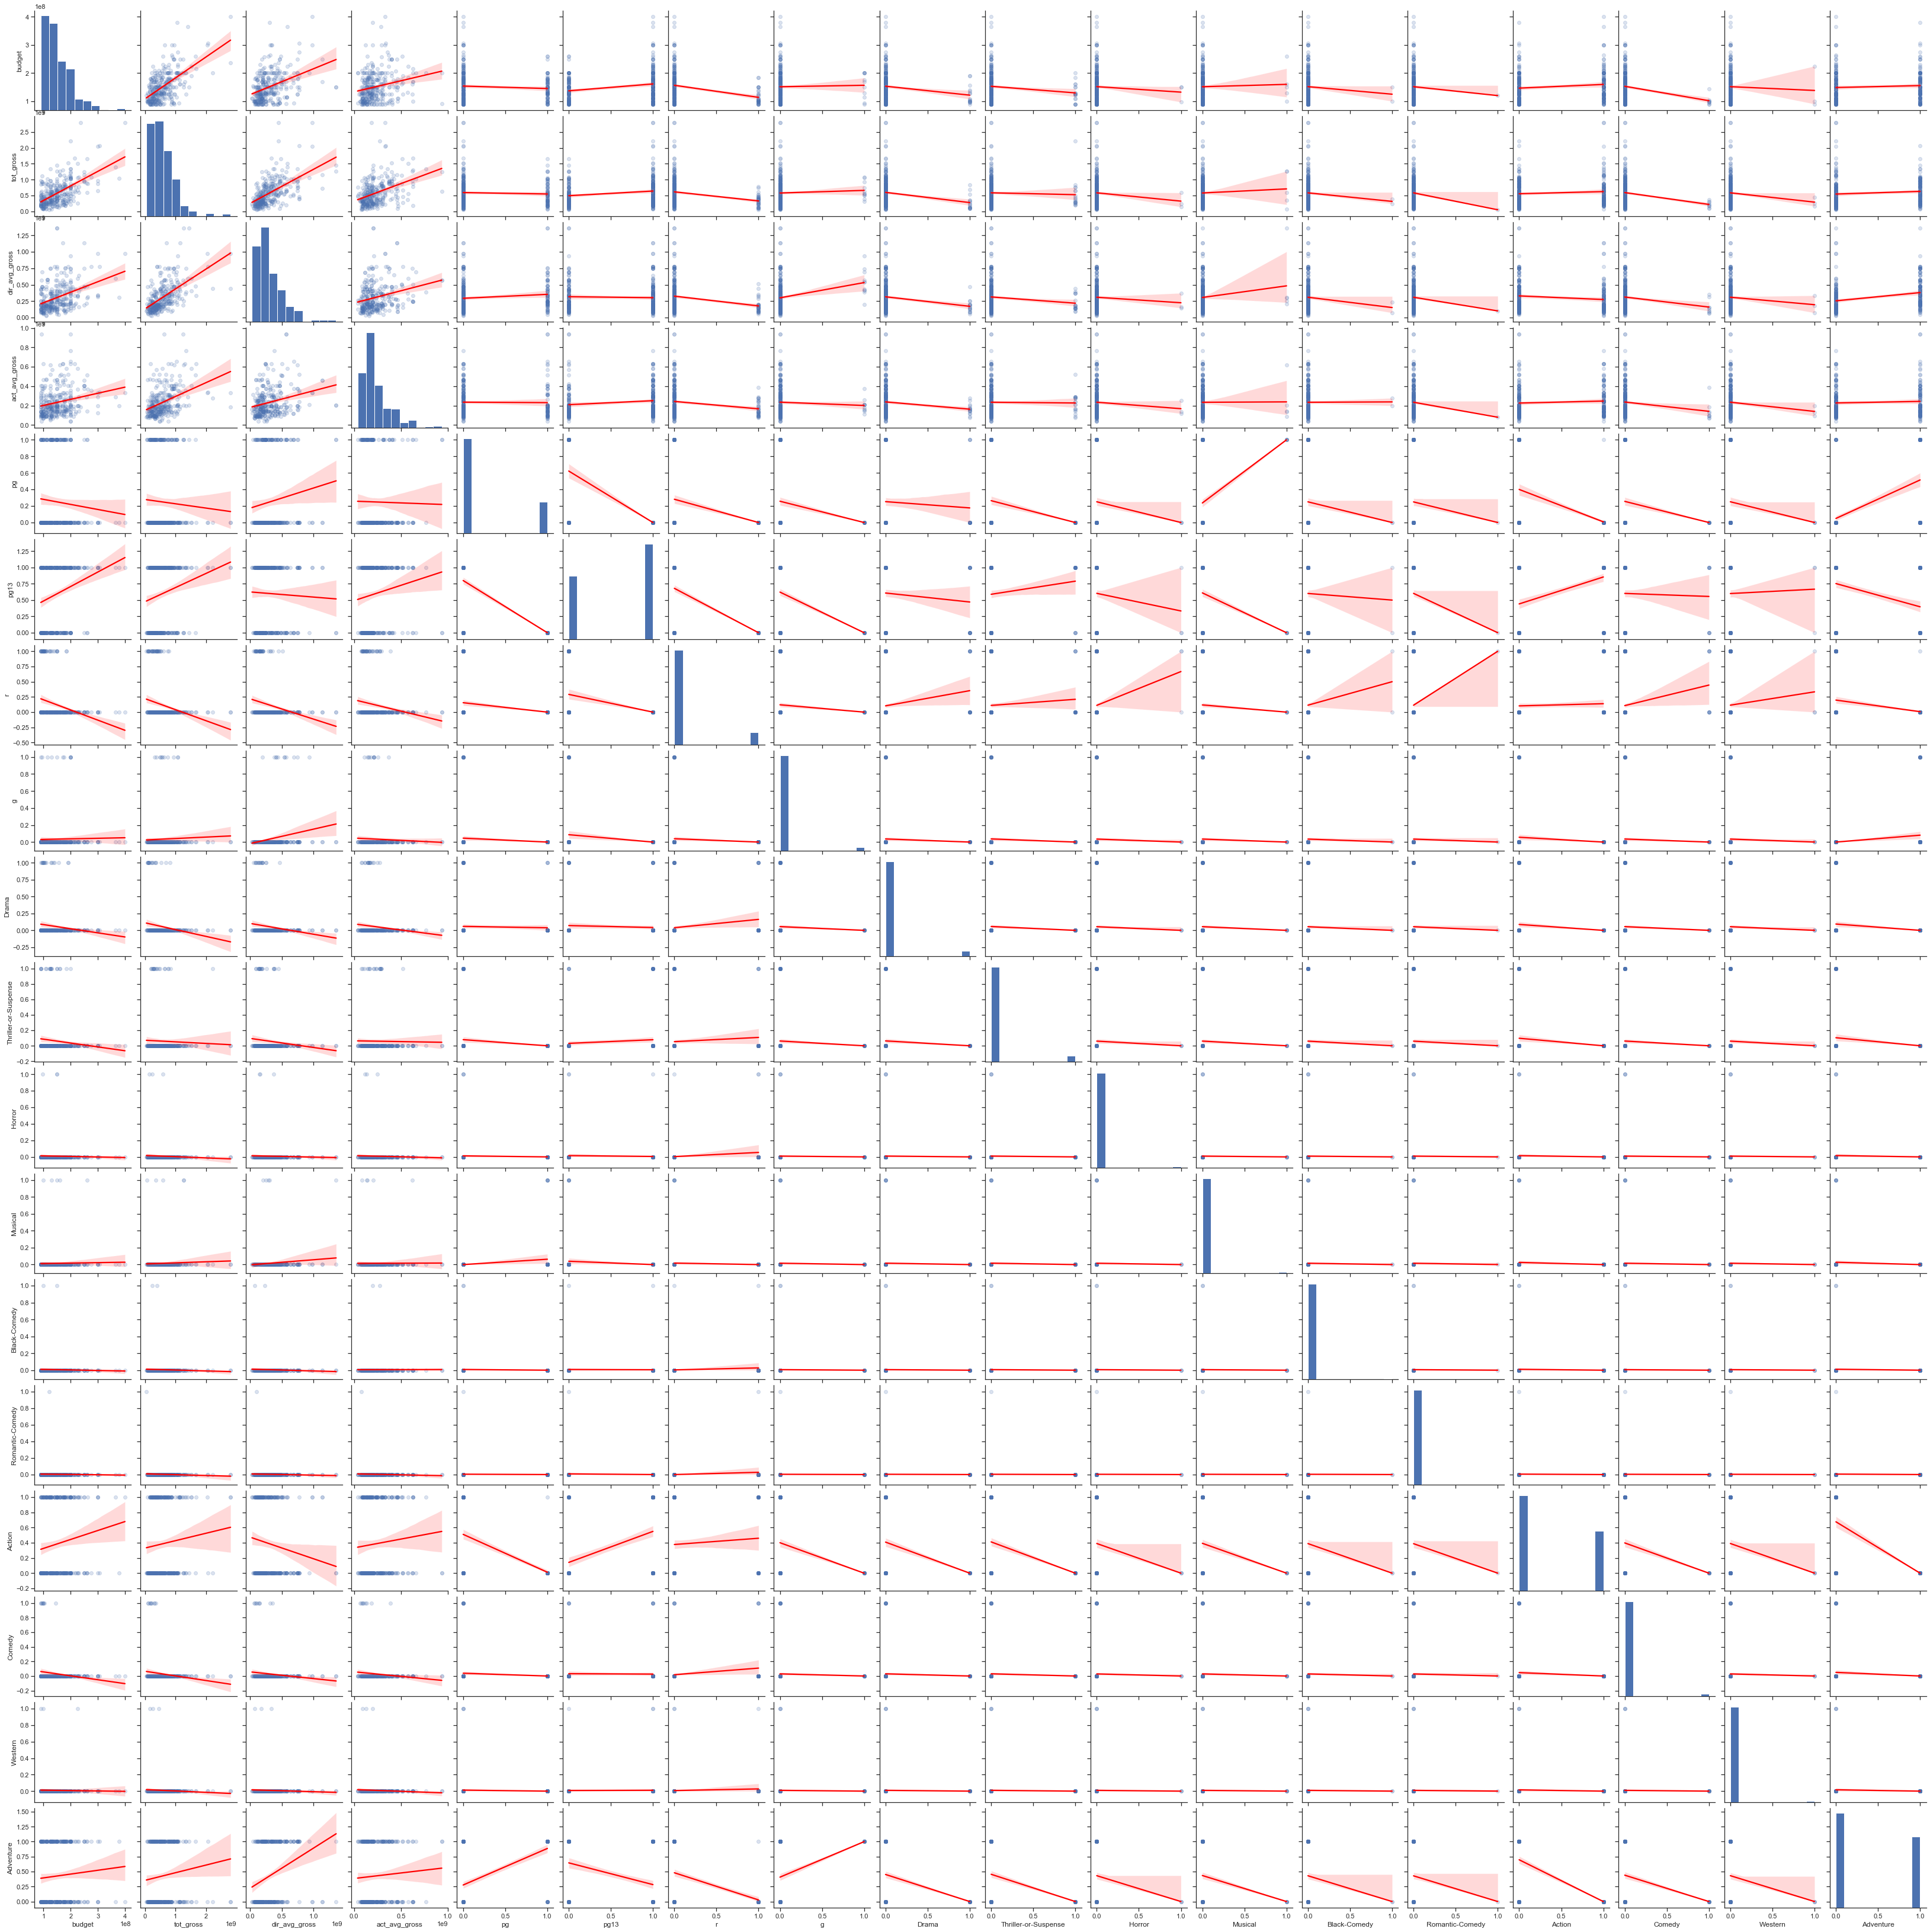

In [8]:
#preliminary plot

sns.pairplot(test_df, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.2}})

# Exploring various models for feature correlation 

In [9]:
# Spliting data into test, training and validation

X, y = test_df[['budget', 'dir_avg_gross', 'act_avg_gross', 'pg', 'pg13', 'r', 'g']], test_df['tot_gross']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

split_and_validate(X_train, y_train)



Validation R^2 score was: 0.23761676014790364
Feature coefficient results: 

budget : 2.79
dir_avg_gross : 0.82
act_avg_gross : 0.60
pg : -20647379.50
pg13 : 67625705.12
r : 45856003.03
g : -92834328.65


In [10]:
#polynomial regression
m = LassoCV()
p = PolynomialFeatures(degree=2)
m.fit(p.fit_transform(X_train),y_train)
m.score(p.transform(X_train),y_train)


0.5538184841603302

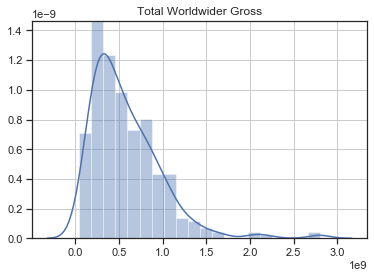

<Figure size 432x288 with 0 Axes>

In [11]:
# hist of film performances
import matplotlib.pyplot as plt
x=test_df.tot_gross.to_numpy()



#n, bins, patches = plt.hist(x, 50, density=True, facecolor='b', alpha=0.75)
sns.distplot(x)
plt.grid(True)
plt.title('Total Worldwider Gross')
plt.show()
plt.savefig("hist.png")

In [12]:
m.score(p.transform(X_test),y_test)


0.461267057707952

In [13]:
#linear regression
m = LinearRegression()
m.fit(X_train, y_train)
m.score(X_train, y_train)



0.5492827121521894

In [14]:
	

corr = pd.DataFrame()
for b in list(test_df.columns.values):
    corr.loc['tot_gross', b] = test_df.corr().loc['tot_gross', b]
    
corr

,budget,tot_gross,dir_avg_gross,act_avg_gross,pg,pg13,r,g,Drama,Thriller-or-Suspense,Horror,Musical,Black-Comedy,Romantic-Comedy,Action,Comedy,Western,Adventure
tot_gross,0.58448,1.0,0.571208,0.396009,-0.048615,0.178352,-0.228145,0.03726,-0.18045,-0.035041,-0.062961,0.03963,-0.052942,-0.074316,0.080753,-0.154329,-0.070592,0.104072


## Visualizing feature correlation

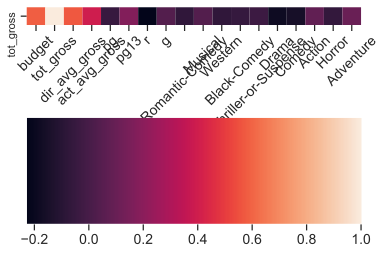

In [349]:
grid_kws = {"height_ratios": (.05, .3), "hspace": 1.5}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)

ax = sns.heatmap(corr, ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"}).set_xticklabels(ax.get_xticklabels(), rotation=45)

In [15]:
model = sm.OLS(y,sm.add_constant(X))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              tot_gross   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     58.90
Date:                Mon, 03 Aug 2020   Prob (F-statistic):           1.92e-48
Time:                        13:23:28   Log-Likelihood:                -6630.8
No. Observations:                 318   AIC:                         1.328e+04
Df Residuals:                     311   BIC:                         1.330e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.023e+08   4.41e+07     -4.585      0.000   -2.89e+08   -1.15e+08
budget            2.9670      0.344      8.619      0.000       2.290       3.644
dir_avg_gross     0.7265      0.084      8.642      0.000       0.561       0.892
act_avg_gross     0.5729      0.113      5.058      0.000       0.350       0.796
pg            -6.914e+07   3.36e+07     -2.060      0.040   -1.35e+08   -3.11e+06
pg13            5.92e+05   3.07e+07      0.019      0.985   -5.97e+07    6.09e+07
r             -3.007e+07   4.17e+07     -0.722      0.471   -1.12e+08    5.19e+07
g             -1.036e+08   7.13e+07     -1.454      0.147   -2.44e+08    3.66e+07
==============================================================================
Omnibus:                      124.080   Durbin-Watson:                   1.628
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              846.397
Skew:                           1.442   Prob(JB):                    1.61e-184
Kurtosis:                      10.454   Cond. No.                     2.83e+24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.56e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Text(0, 0.5, 'Residual')

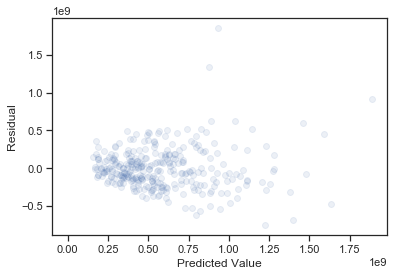

In [16]:
# Baseline plot

y_pred = results.predict(sm.add_constant(X))

plt.scatter(y_pred,y-y_pred,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,0,1000))
plt.xlabel('Predicted Value')
plt.ylabel('Residual')

# LINEAR REGRESSION

In [17]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=5) 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=6)
std = StandardScaler()
std.fit(X_train)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
lm = LinearRegression()
lm.fit(X_train, y_train)

lm.score(X_val,y_val)

0.3724472424516252

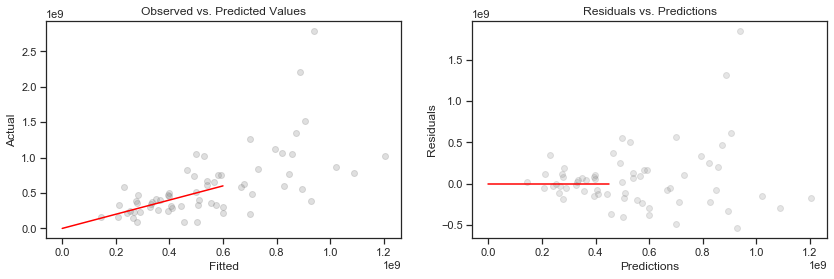

In [19]:





plt.figure(figsize=(14,4))

# Plotting predicted vs. observed
y_pred = lm.predict(X_val)
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_val, alpha=0.25, color='gray')
plt.plot([0, 600000000], [0, 600000000], color='red')
plt.xlabel('Fitted')
plt.ylabel('Actual')
plt.title("Observed vs. Predicted Values")
plt.savefig("actual_vs_observed.png")

# Residuals
lm_residuals = y_val - y_pred
plt.subplot(1, 2, 2)
plt.scatter(y_pred, lm_residuals, alpha=.2, color='gray')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.plot([0,450000000], [0, 0], color='red')
plt.title("Residuals vs. Predictions")
plt.savefig("residuals.png");


In [20]:
X_columns='budget', 'dir_avg_gross', 'act_avg_gross', 'pg', 'pg13', 'r', 'g'
list(zip(X_columns,lm.coef_))

[('budget', 2.9127318798544493),
 ('dir_avg_gross', 0.8289657230940184),
 ('act_avg_gross', 0.614191176430722),
 ('pg', -62893809.148502454),
 ('pg13', 61486922.67895487),
 ('r', 49614814.740406),
 ('g', -48207928.270857684)]

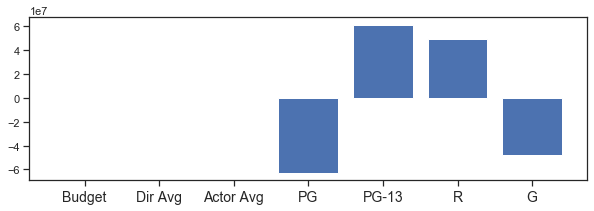

In [21]:
# INITIAL FEATURE IMPORTANCE
xlbl=('Budget', 'Dir Avg', 'Actor Avg', 'PG', 'PG-13', 'R', 'G')
plt.figure(figsize=(10,3))
plt.rc('xtick', labelsize=14)
plt.bar(xlbl,lm.coef_)

plt.savefig("Feature_Plot.png");

In [22]:

def RMSE(actuals, preds): #root mean squared error
    return np.sqrt(np.mean((actuals - preds)**2))

RMSE(y_test,y_pred)

362946093.1563587

In [23]:
# Using Ridge regularization and cross validation
# Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

lm_reg = Ridge(alpha=1)

In [311]:
# Using Lasso regularization
lm_lasso = Lasso()

# Regularization
Need to use polynomial features to compensate for MPAA rating values 

In [24]:
# Trying polynomial features for the datasets

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

lm_poly = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)
print('Linear Regression val R^2: %.3f', lm.score(X_val, y_val))

lm_reg.fit(X_train_scaled, y_train)
print('Ridge Regression val R^2: %.3f', lm_reg.score(X_val_scaled, y_val))

lm_lasso.fit(X_train_scaled, y_train)
print('Lasso Regression val R^2: %.3f', lm_lasso.score(X_val_scaled, y_val))

lm_poly.fit(X_train_poly, y_train)
print('Degree 2 polynomial regression val R^2: %.3f', lm_poly.score(X_val_poly, y_val))

In [ ]:
list(zip(X_columns,lm_reg.coef_))

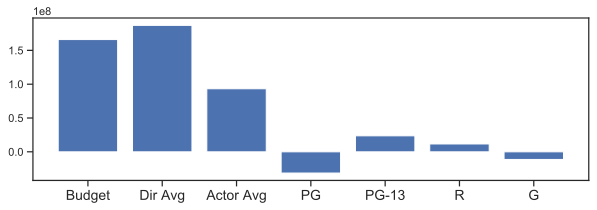

In [361]:
# Important as standardized so can see relative importance
plt.figure(figsize=(10,3))
plt.rc('xtick', labelsize=14)
plt.bar(xlbl,lm_reg.coef_)
plt.savefig("Feature_Plot_Ridge.png");

In [ ]:
RMSE(lm_reg.predict(X_val_scaled),y_val)

## Cross validation test


In [27]:
X, y = test_df[['budget', 'dir_avg_gross', 'act_avg_gross', 'pg', 'pg13', 'r', 'g']], test_df['tot_gross']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=7) 

X, y = np.array(X), np.array(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

lm_cv = LinearRegression()
lm_reg_cv = Ridge(alpha=1)
kf = KFold(n_splits=5, shuffle=True, random_state = 71)


print(cross_val_score(lm_cv, X, y, cv=kf, scoring='r2'))
print(np.mean(cross_val_score(lm_cv, X, y, cv=kf, scoring='r2')))

[0.46638422 0.549746   0.61531162 0.43238912 0.42568106]
0.4979024056545029


In [ ]:
lm_lasso_cv = Lasso()
print(cross_val_score(lm_lasso_cv, X, y,
                                cv=kf,       
                                scoring='r2'))
print(np.mean(cross_val_score(lm_lasso_cv, X, y,
                                cv=kf,       
                                scoring='r2')))

In [29]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf = RandomForestRegressor(n_estimators=1800, max_features=3)
rf.fit(X_train, y_train)
rf.score(X_val, y_val)
RMSE(rf.predict(X_val),y_val)

381615970.9997686

In [30]:

gbm = GradientBoostingRegressor(n_estimators=1600, max_depth=3, learning_rate=.01)
gbm.fit(X_train, y_train)
gbm.score(X_val, y_val)

0.29612996472315434

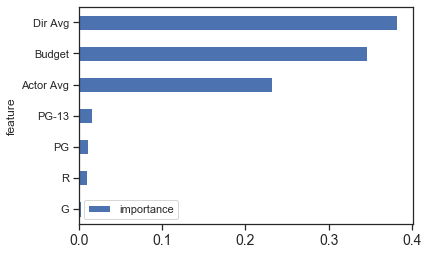

In [31]:
feat_imps = list(zip(xlbl,rf.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])



feat_imps.plot.barh(x='feature',y='importance')
plt.savefig("RandomForestRegressor.png")

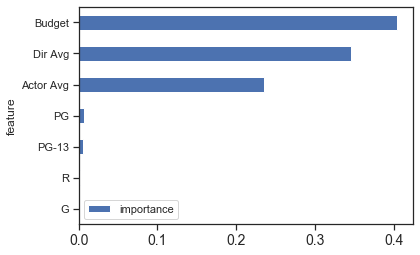

In [32]:
feat_imps = list(zip(xlbl,gbm.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.plot.barh(x='feature',y='importance')
plt.savefig("GradientBoostingRegressor.PNG")